#### 将整个数据集中的缺失值用可视化的手段表现出来，并想办法处理他们（填补或者删除）
#### 将除了“SeriousDlqin2yrs”列的其他列的异常值，用可视化的手段表现出来，并且去除。（包括但不限于散点图，分布图，箱线图）
#### 返回一张新的，干净的表
SeriousDlqin2yrs：超过90天或更糟的逾期拖欠

RevolvingUtilization Of UnsecuredLines：无担保放款的循环利用：除了不动产和像车 贷那样除以信用额度总和的无分期付款债务的信用卡和个人信用额度总额(贷款以及信用卡可用额度与总额度的比例)
Age：借款人年龄

NumberOfTime30-59DaysPastDueNotWorse：30-59天逾期次数

DebtRatio：负债比例

MonthlyIncome：月收入

Number Of OpenCreditLinesAndLoans：贷款数量

NumberOfTimes90DaysLate：90天逾期次数：借款者有90天或更高逾期的次数

NumberReal Estate Loans Or Lines：不动产贷款或额度数量：抵押贷款和不动产放款包括房屋净值信贷额度

Number Of Time 60-89Days PastDue Not Worse：60-89天逾期次数

NumberOfDependents：不包括本人在内的家属数量 首先是基于个人借贷的场景，确定“违约”的定义： 根据新的Basel II Capital Accord（巴塞尔二资本协议），一般逾期90天算作违约。

In [8]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
path = "E:\kaggledatabase\GiveMeSomeCredit\\"

data = pd.read_csv(path+"cs-training.csv")


In [9]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
#重命名列
col = ["index0",'target','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
len(col)
df = data.copy()
df.columns=col
#重置索引
del df['index0']


 

In [11]:
df.head()

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


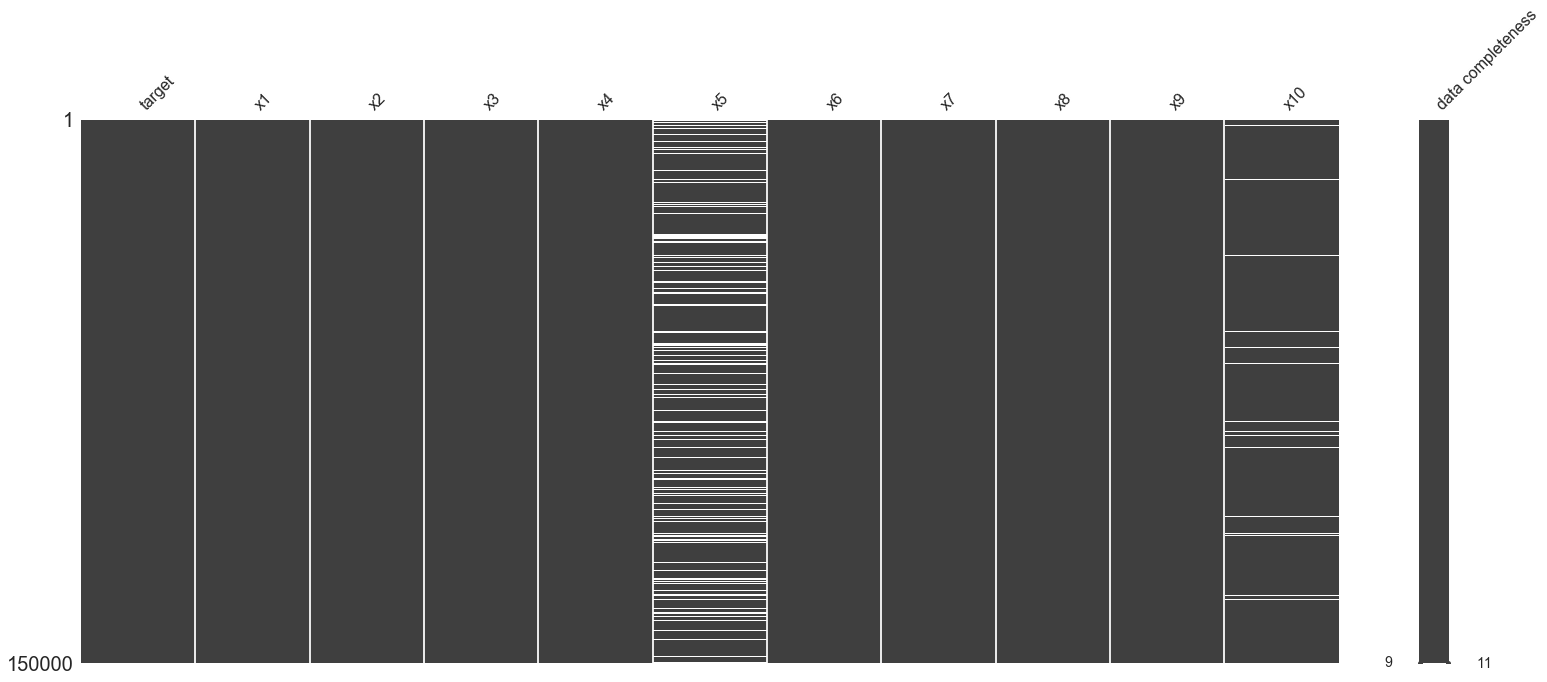

In [12]:
#先填补缺失值

import missingno as msno
msno.matrix(df, labels=True,)

由此可见，x5与x10缺失严重

In [13]:
#可视化缺失值比例
df.isnull().mean()

target    0.000000
x1        0.000000
x2        0.000000
x3        0.000000
x4        0.000000
x5        0.198207
x6        0.000000
x7        0.000000
x8        0.000000
x9        0.000000
x10       0.026160
dtype: float64

<BarContainer object of 2 artists>

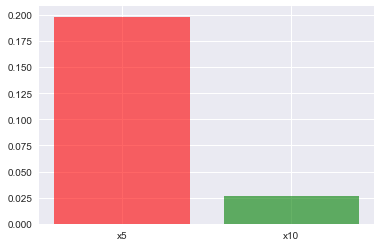

In [14]:
namean = df.isnull().mean()
num_list = [namean.max(),0.026160]
name_list = ["x5","x10"]
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list,alpha=0.6)


In [15]:
#填补空缺值，这里使用完善的数据
data = pd.read_csv("nonull.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 12 columns):
Unnamed: 0                              149391 non-null int64
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [16]:
#重命名列
col = ["index0",'target','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']
len(col)
df = data.copy()
df.columns=col
#重置索引
del df['index0']


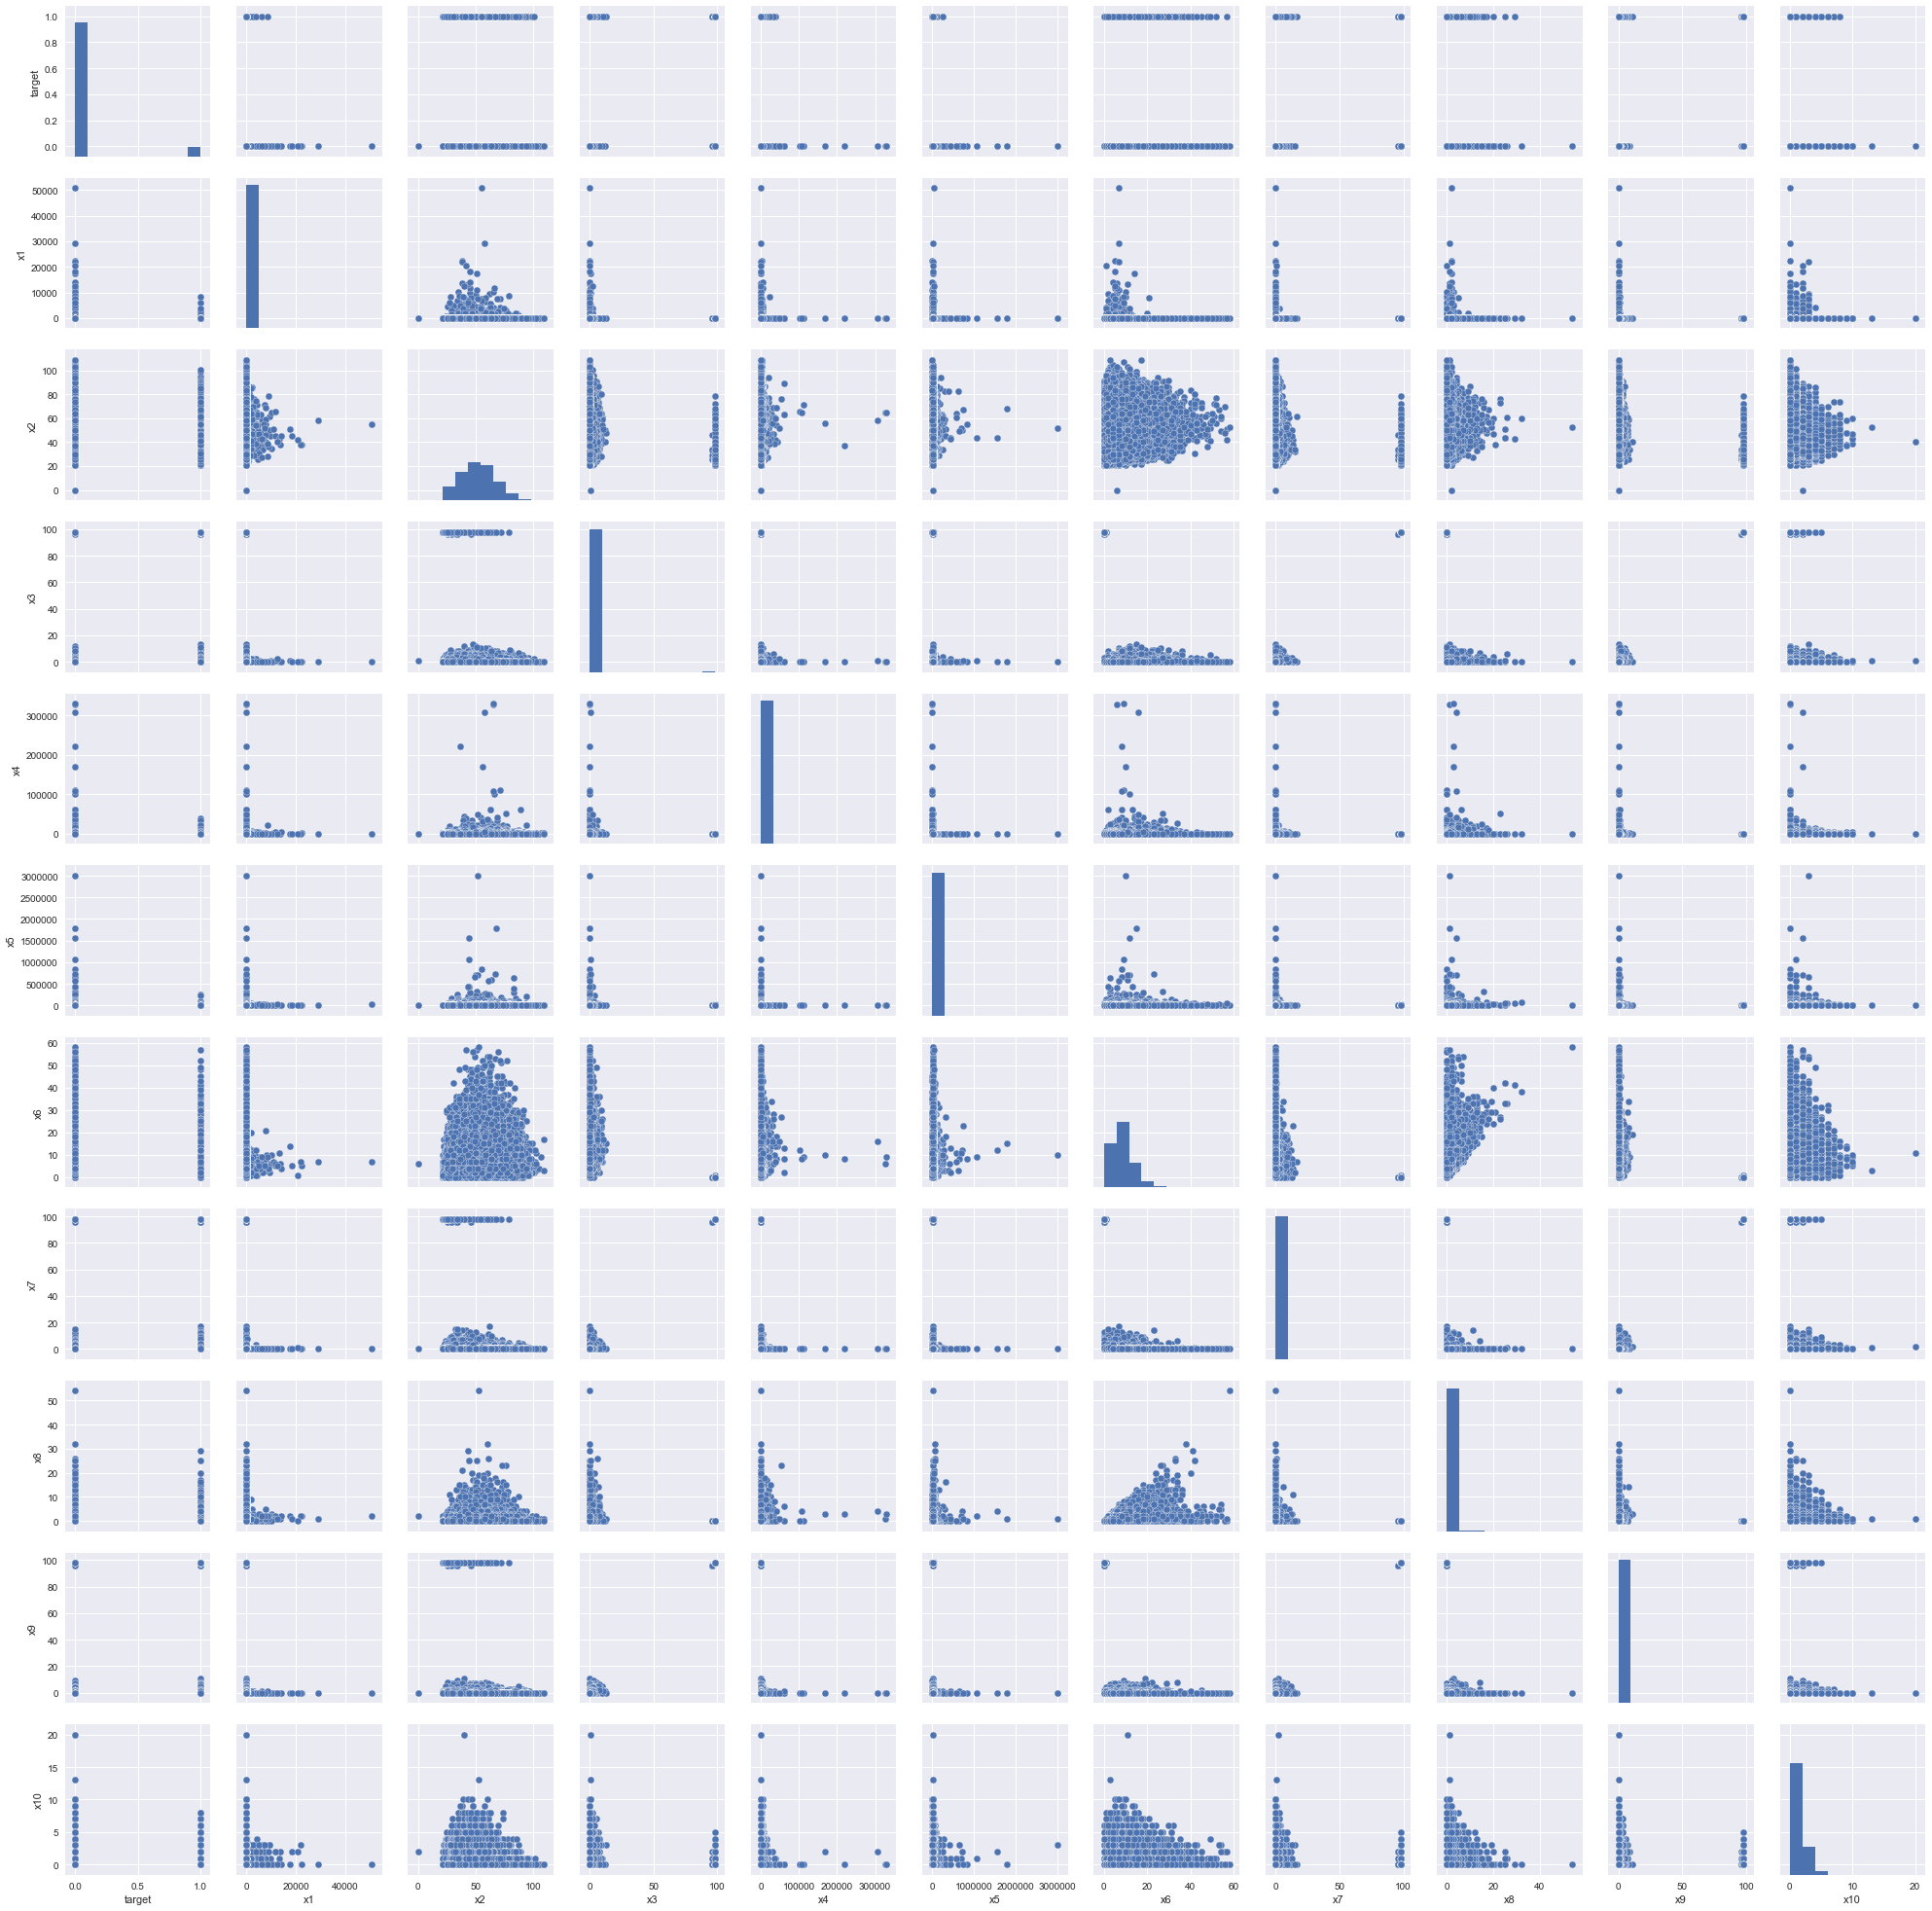

In [17]:
sns.pairplot(df) 

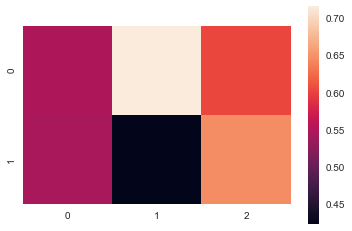

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import seaborn as sns
# 初始化参数
sns.set()
uniform_data = np.random.rand(10, 3)
heatmap = sns.heatmap(uniform_data,square=True)
plt.show()

In [26]:
#查看各属性相关值
df1 = df.iloc[:,1:]
df1.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'], dtype='object')

In [27]:
df1.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,-0.005940,-0.001290,0.003946,0.006083,-0.011445,-0.001012,0.006163,-0.000997,0.001134
x2,-0.005940,1.000000,-0.055190,0.024191,0.007681,0.147023,-0.052953,0.032699,-0.048733,-0.217500
x3,-0.001290,-0.055190,1.000000,-0.005912,-0.006302,-0.048779,0.980489,-0.027009,0.984535,-0.000299
x4,0.003946,0.024191,-0.005912,1.000000,-0.070824,0.048814,-0.007823,0.119618,-0.006963,-0.044983
x5,0.006083,0.007681,-0.006302,-0.070824,1.000000,0.098728,-0.009571,0.119246,-0.008174,0.095341
x6,-0.011445,0.147023,-0.048779,0.048814,0.098728,1.000000,-0.075569,0.431410,-0.065805,0.070753
x7,-0.001012,-0.052953,0.980489,-0.007823,-0.009571,-0.075569,1.000000,-0.042856,0.991409,-0.008209
x8,0.006163,0.032699,-0.027009,0.119618,0.119246,0.431410,-0.042856,1.000000,-0.036856,0.127300
x9,-0.000997,-0.048733,0.984535,-0.006963,-0.008174,-0.065805,0.991409,-0.036856,1.000000,-0.008975
x10,0.001134,-0.217500,-0.000299,-0.044983,0.095341,0.070753,-0.008209,0.127300,-0.008975,1.000000


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 10 columns):
x1     149391 non-null float64
x2     149391 non-null int64
x3     149391 non-null int64
x4     149391 non-null float64
x5     149391 non-null float64
x6     149391 non-null int64
x7     149391 non-null int64
x8     149391 non-null int64
x9     149391 non-null int64
x10    149391 non-null float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


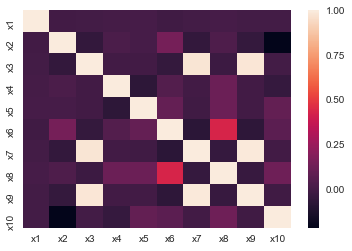

In [28]:
sns.heatmap(df1.corr())

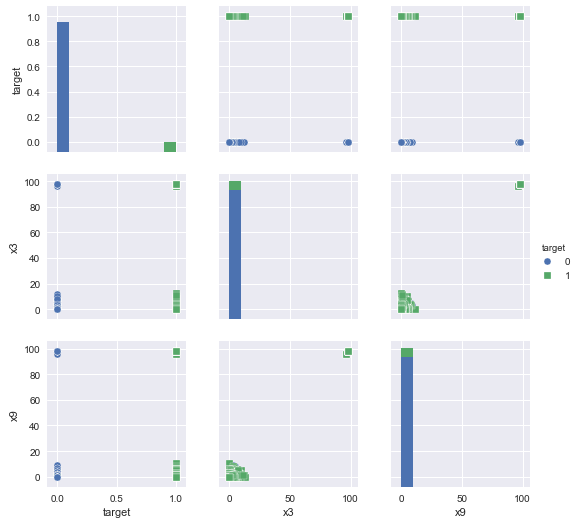

In [29]:
#相关性图，和某一列的关系
df2 = df[["target","x3","x9"]]
sns.pairplot(df2,hue='target',markers=['o','s'])

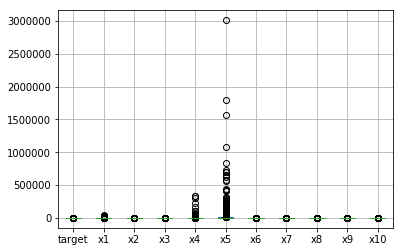

In [15]:
#筛选异常值
#箱线图1
df.boxplot()

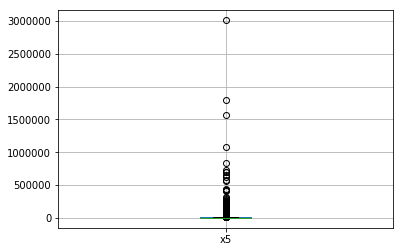

In [16]:
#查看单个特征数据分布箱线图,发现x5离散情况较严重
df_x5 = df[['x5']]
df_x5.boxplot()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


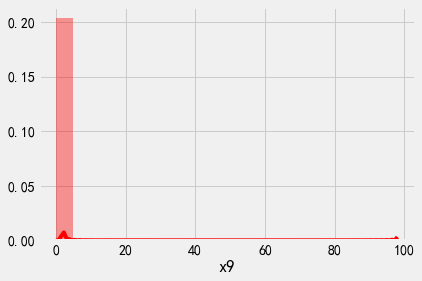

In [17]:
import seaborn as sns
plt.style.available
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei',"Arial"]})
sns.distplot(df['x9'],bins=20,color='red')

In [18]:
df.head()

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [19]:
#构造特征方程
features = df.copy()
del features['target']


均值为：8.481，标准差为：5.137
异常值共1898条


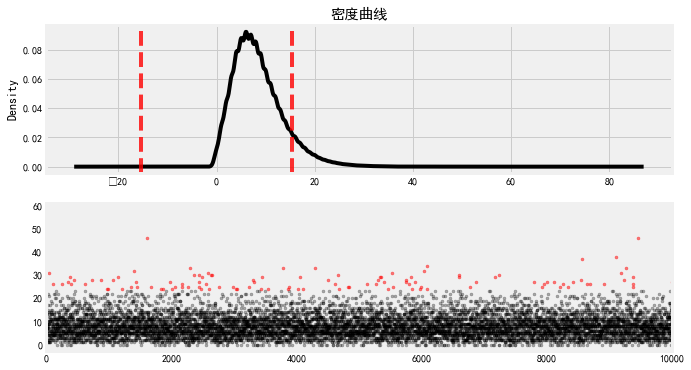

In [23]:
#异常值是指样本中的个别值，其数值明显偏离其余的观测值。
#异常值也称离群点，异常值的分析也称为离群点的分析

#异常值分析 → 3σ原则 / 箱型图分析
#异常值处理方法 → 删除 / 修正填补

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats
% matplotlib inline

# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003

#data = pd.Series(random.sample(range(100000),1000))
data =  df['x6']
u = data.mean()  # 计算均值
std = data.std()  # 计算标准差
#stats.kstest(data, 'norm', (u, std))
print('均值为：%.3f，标准差为：%.3f' % (u,std))

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
data.plot(kind = 'kde',grid = True,style = '-k',title = '密度曲线')
plt.axvline(3*std,hold=None,color='r',linestyle="--",alpha=0.8) 
plt.axvline(-3*std,hold=None,color='r',linestyle="--",alpha=0.8) 
# 绘制数据密度曲线

error = data[np.abs(data - u) > 3*std]
data_c = data[np.abs(data - u) <= 3*std]
print('异常值共%i条' % len(error))
# 筛选出异常值error、剔除异常值之后的数据data_c
ax2 = fig.add_subplot(2,1,2)
plt.scatter(data_c.index,data_c,color = 'k',marker='.',alpha = 0.3)
plt.scatter(error.index,error,color = 'r',marker='.',alpha = 0.5)
plt.xlim([-10,10010])
plt.grid()
#图表表达

In [21]:
type(df['x5'])

pandas.core.series.Series

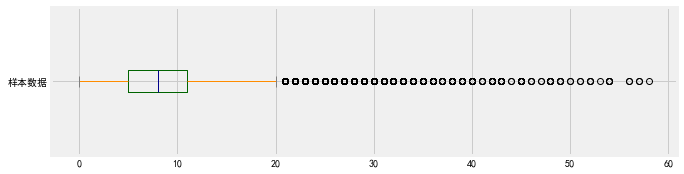

In [24]:
# （2）箱型图分析
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid = True,color = color,ax = ax1,label = '样本数据')
# 箱型图看数据分布情况
# 以内限为界

In [ ]:
#分区间，初步分箱